In [1]:
from enum import Enum
from IPython.display import Image
import numpy as np

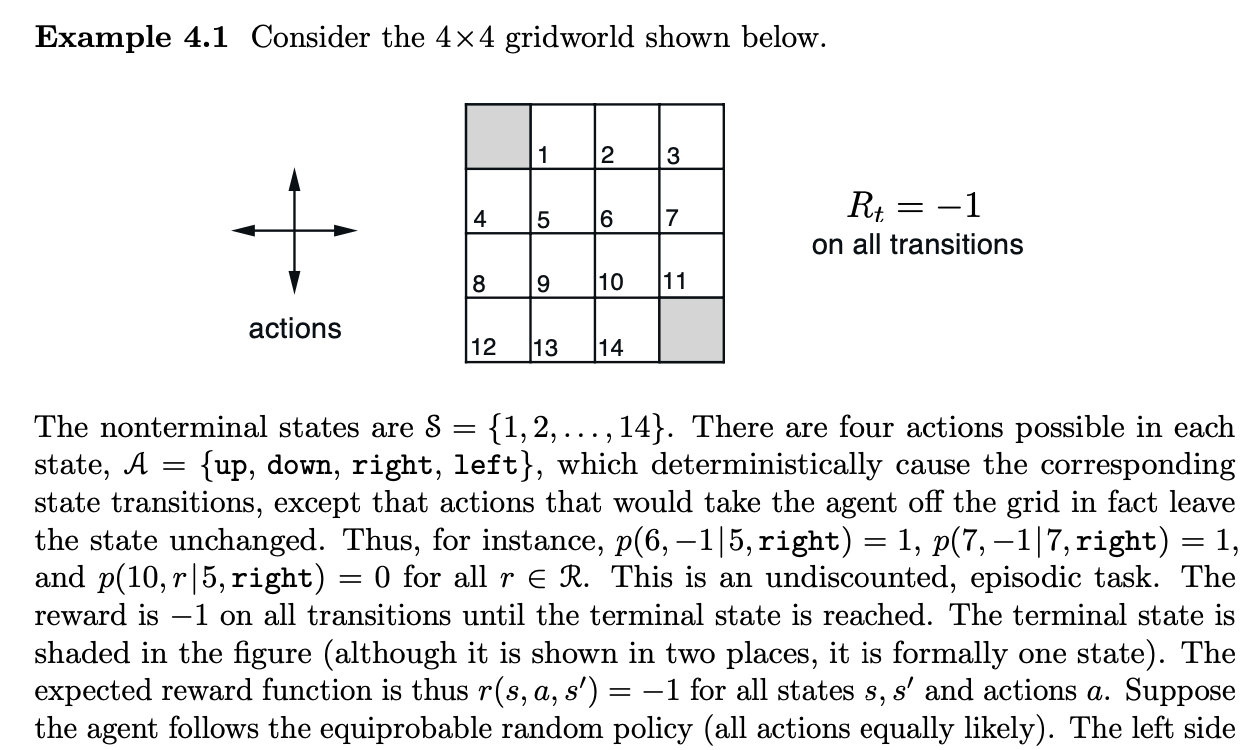

In [2]:
Image("Screen Shot 2021-01-02 at 20.32.23.png")

### Setting the game up

In [3]:
class Actions(Enum):
    UP = 0
    RIGHT = 1
    DOWN = 2
    LEFT = 3

    
def gridworld_action(state: tuple, action: Actions):
    i, j = state
    
    if action.name == 'UP':
        i -= 1
    elif action.name == 'RIGHT':
        j +=1
    elif action.name == 'DOWN':
        i +=1
    else:
        j -=1
        
    i = np.clip(i, 0, 3)
    j = np.clip(j, 0, 3)
    new_state = (i, j)
    
    return new_state

### Iterative policy evaluation
Iterative policy evaluation allows us to estimate the state-value functions for a policy pi, $\upsilon_{\pi }(s)$, of a finite MDP: where $s \in S$

In this example, we are providing three predefined policies. None of these are optimal, but are ordered in increasingly good order.

In [4]:
def iterative_policy_evaluation(theta, v, pi):
    
    gamma = 1  # episodic task, no discounting
    v_prime = np.zeros(v.shape)
    delta_max = 0
    
    for i in range(4):
        
        for j in range(4):
            
            state = (i, j)
            
            if sum(state) in [0, 6]:  # terminal state
                continue
            
            else:
                r = -1  # cost of each action
                new_state_value = 0
                
                for a in Actions:  # new estimate of state value function
                    next_state_value = v[gridworld_action(state, a)]
                    q = pi[a.value] * (r + gamma * next_state_value)
                    new_state_value += q
                    
                change = abs(new_state_value - v[state])
                delta_max = change if change > delta_max else delta_max
                
                v_prime[state] = new_state_value
    
    if delta_max <= theta:
        return v_prime
    
    else:
        return iterative_policy_evaluation(theta, v_prime, pi)
    
threshold = 0.001
state_values = np.zeros((4,4))

policy1 = (0.25, 0.25, 0.25, 0.25)
policy2 = (0.35, 0.15, 0.15, 0.35)  # more likely up than down and left than right
policy3 = (0.5, 0., 0., 0.5)  # never down and right

policies = [policy1, policy2, policy3]

for c, policy in enumerate(policies):
    print(f'=== POLICY {c+1} ===')
    v_pi = iterative_policy_evaluation(threshold, state_values, policy)
    print(np.round(v_pi, 1), '\n')

=== POLICY 1 ===
[[  0. -14. -20. -22.]
 [-14. -18. -20. -20.]
 [-20. -20. -18. -14.]
 [-22. -20. -14.   0.]] 

=== POLICY 2 ===
[[  0.   -6.  -10.6 -13.5]
 [ -6.   -8.7 -11.8 -13.7]
 [-10.6 -11.8 -12.9 -12.1]
 [-13.5 -13.7 -12.1   0. ]] 

=== POLICY 3 ===
[[ 0.  -2.  -4.  -6. ]
 [-2.  -3.  -4.5 -6.2]
 [-4.  -4.5 -5.5 -6.9]
 [-6.  -6.2 -6.9  0. ]] 

